In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(tf.keras.__version__)

2.4.0
2.4.0


In [2]:
#loading mnist fashion dataset
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


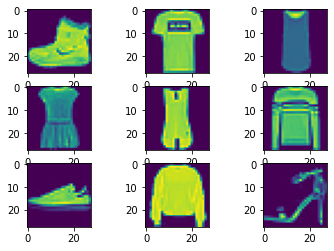

In [4]:
#display few images from dataset
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(X_train[i])
plt.show()

In [5]:
#reshape the data to flatten
reshaped=784
X_train = X_train.reshape(60000,reshaped)
X_test = X_test.reshape(10000,reshaped)

#convert the data type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalizing the input
X_train /= 255
X_test /= 255

#one-hot encoding the labels, there are 10 labels in the dataset
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


# model_0: Single Layer Perceptron Model

In [7]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
model_0.add(Dense(10, input_shape=(784,), name="single_layer", activation='softmax'))

In [9]:
#compiling the model
model_0.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
#training the model
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.3293 - accuracy: 0.6010 - val_loss: 0.7571 - val_accuracy: 0.7613
Epoch 2/50
750/750 [==============================] - 1s 1ms/step - loss: 0.7264 - accuracy: 0.7695 - val_loss: 0.6557 - val_accuracy: 0.7891
Epoch 3/50
750/750 [==============================] - 1s 1ms/step - loss: 0.6457 - accuracy: 0.7945 - val_loss: 0.6066 - val_accuracy: 0.8016
Epoch 4/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.8079 - val_loss: 0.5784 - val_accuracy: 0.8100
Epoch 5/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5770 - accuracy: 0.8109 - val_loss: 0.5585 - val_accuracy: 0.8142
Epoch 6/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.8182 - val_loss: 0.5426 - val_accuracy: 0.8191
Epoch 7/50
750/750 [==============================] - 1s 1ms/step - loss: 0.5399 - accuracy: 0.8214 - val_loss: 0.5310 - val_accuracy: 0.8217
Epoch 

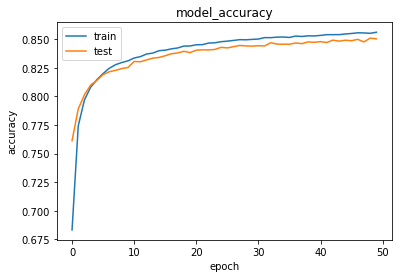

In [13]:
#visualizing the change in accuracy vs epochs
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#evaluating the model on test data
test_loss, test_accuracy = model_0.evaluate(X_test, Y_test)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 0s 887us/step - loss: 0.4628 - accuracy: 0.8393
Test Accuracy: 0.8392999768257141


In [15]:
#model summary
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
single_layer (Dense)         (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# model_1: Multilayer Perceptron Model with Hidden Layer

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#Most common type of model is a stack of layers
model_1 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_1.add(Dense(N_hidden, name='frist_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_1.add(Dense(N_hidden, name='second_layer', activation='relu'))
# After the first layer, you don't need to specify the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_1.add(Dense(10, name='softmax_layer', activation = 'softmax'))

In [21]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.4625 - accuracy: 0.5292 - val_loss: 0.6691 - val_accuracy: 0.7749
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.6374 - accuracy: 0.7828 - val_loss: 0.5575 - val_accuracy: 0.8076
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5442 - accuracy: 0.8137 - val_loss: 0.5101 - val_accuracy: 0.8229
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.5101 - accuracy: 0.8246 - val_loss: 0.4861 - val_accuracy: 0.8300
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.8360 - val_loss: 0.4649 - val_accuracy: 0.8356
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4577 - accuracy: 0.8373 - val_loss: 0.4596 - val_accuracy: 0.8420
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.8492 - val_loss: 0.4420 - val_accuracy: 0.8450
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


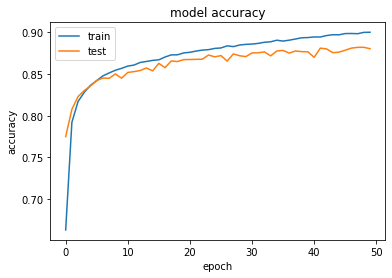

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#evaluating the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3635 - accuracy: 0.8707
Test accuracy: 0.8707000017166138


In [25]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
frist_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
second_layer (Dense)         (None, 64)                4160      
_________________________________________________________________
softmax_layer (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


# model_2: Adding drop out layer to prevent overfitting

In [26]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_2.add(Dropout(0.3))
# Adding another dense layer:
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [27]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Training the model. 
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 1.7086 - accuracy: 0.4083 - val_loss: 0.8008 - val_accuracy: 0.7241
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9474 - accuracy: 0.6607 - val_loss: 0.6576 - val_accuracy: 0.7711
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7961 - accuracy: 0.7236 - val_loss: 0.5879 - val_accuracy: 0.7956
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7153 - accuracy: 0.7516 - val_loss: 0.5444 - val_accuracy: 0.8098
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6744 - accuracy: 0.7677 - val_loss: 0.5156 - val_accuracy: 0.8171
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.6296 - accuracy: 0.7806 - val_loss: 0.4945 - val_accuracy: 0.8252
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.5999 - accuracy: 0.7940 - val_loss: 0.4796 - val_accuracy: 0.8302
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


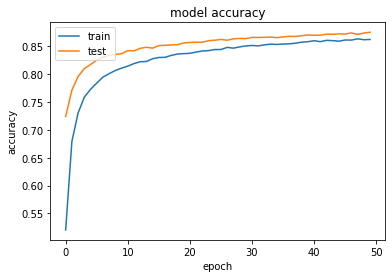

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8657
Test accuracy: 0.8657000064849854


In [31]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


# model_3: Increase the hidden layer neurons

In [32]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 128 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [33]:
# Compiling the model.
model_3.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
# Training the model. 
training = model_3.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2) 

Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 1.5864 - accuracy: 0.4618 - val_loss: 0.7185 - val_accuracy: 0.7639
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.8183 - accuracy: 0.7129 - val_loss: 0.5992 - val_accuracy: 0.7956
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6993 - accuracy: 0.7565 - val_loss: 0.5393 - val_accuracy: 0.8127
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6289 - accuracy: 0.7839 - val_loss: 0.5079 - val_accuracy: 0.8210
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5849 - accuracy: 0.7973 - val_loss: 0.4820 - val_accuracy: 0.8296
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5599 - accuracy: 0.8053 - val_loss: 0.4648 - val_accuracy: 0.8338
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5451 - accuracy: 0.8095 - val_loss: 0.4506 - val_accuracy: 0.8376
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


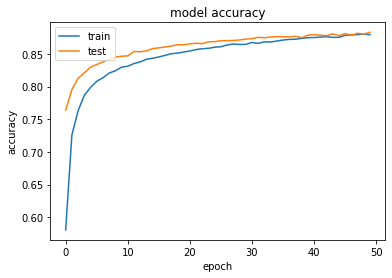

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
#evaluate the model
test_loss, test_acc = model_3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3521 - accuracy: 0.8754
Test accuracy: 0.8754000067710876


In [37]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# model_4: Increasing the hidden layers and changing the Optimizer

In [38]:
model_4 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 128 units to the model:
model_4.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_4.add(Dropout(0.3))

# Adding additional dense and dropout layers:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_4.add(Dropout(0.3))

model_4.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_4.add(Dropout(0.3))

model_4.add(Dense(N_hidden, name='dense_layer_4', activation='relu'))
model_4.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_4.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

In [39]:
# Compiling the model with Adam optimizer
model_4.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
# Training the model. 
training = model_4.fit(X_train, Y_train, batch_size=128, epochs=30, validation_split=0.2) 

Epoch 1/30
375/375 [==============================] - 3s 6ms/step - loss: 1.2523 - accuracy: 0.5332 - val_loss: 0.4827 - val_accuracy: 0.8286
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.5576 - accuracy: 0.8058 - val_loss: 0.4278 - val_accuracy: 0.8448
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4779 - accuracy: 0.8333 - val_loss: 0.3929 - val_accuracy: 0.8562
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4444 - accuracy: 0.8450 - val_loss: 0.3844 - val_accuracy: 0.8638
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4279 - accuracy: 0.8483 - val_loss: 0.3759 - val_accuracy: 0.8652
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4103 - accuracy: 0.8567 - val_loss: 0.3695 - val_accuracy: 0.8662
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3927 - accuracy: 0.8619 - val_loss: 0.3554 - val_accuracy: 0.8732
Epoch 

In [41]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8768
Test accuracy: 0.876800000667572


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


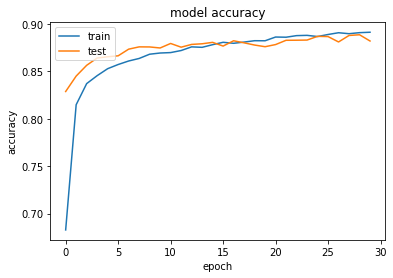

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 128)              

# model_5: Manipulating the batch_size and epochs

In [44]:
model_5 = tf.keras.Sequential()
N_hidden = 128
# Adds a densely-connected layer with 128 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_5.add(Dropout(0.3))

# Adding additional dense and dropout layers:
model_5.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_5.add(Dropout(0.3))

model_5.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_5.add(Dropout(0.3))

model_5.add(Dense(N_hidden, name='dense_layer_4', activation='relu'))
model_5.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_5.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

In [45]:
# Compiling the model with Adam optimizer
model_5.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
# Training the model. 
training = model_5.fit(X_train, Y_train, batch_size=75, epochs=20, validation_split=0.2) 

Epoch 1/20
640/640 [==============================] - 3s 4ms/step - loss: 1.1269 - accuracy: 0.5727 - val_loss: 0.4647 - val_accuracy: 0.8324
Epoch 2/20
640/640 [==============================] - 3s 4ms/step - loss: 0.5236 - accuracy: 0.8149 - val_loss: 0.4325 - val_accuracy: 0.8442
Epoch 3/20
640/640 [==============================] - 3s 4ms/step - loss: 0.4722 - accuracy: 0.8337 - val_loss: 0.4096 - val_accuracy: 0.8538
Epoch 4/20
640/640 [==============================] - 3s 4ms/step - loss: 0.4483 - accuracy: 0.8435 - val_loss: 0.3856 - val_accuracy: 0.8595
Epoch 5/20
640/640 [==============================] - 3s 4ms/step - loss: 0.4240 - accuracy: 0.8515 - val_loss: 0.3770 - val_accuracy: 0.8663
Epoch 6/20
640/640 [==============================] - 3s 4ms/step - loss: 0.4082 - accuracy: 0.8548 - val_loss: 0.3857 - val_accuracy: 0.8629
Epoch 7/20
640/640 [==============================] - 3s 4ms/step - loss: 0.4034 - accuracy: 0.8536 - val_loss: 0.3715 - val_accuracy: 0.8708
Epoch 

In [47]:
#evaluate the model_5
test_loss, test_acc = model_5.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3515 - accuracy: 0.8766
Test accuracy: 0.8766000270843506


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


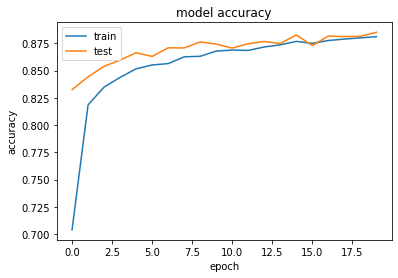

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 128)              

# model_6: Final Model

In [62]:
model_6 = tf.keras.Sequential()
N_hidden = 512
# Adds a densely-connected layer with 128 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.4))

# Adding additional dense and dropout layers:
model_6.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.4))

model_6.add(Dense(N_hidden, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.4))

model_6.add(Dense(N_hidden, name='dense_layer_4', activation='relu'))
model_6.add(Dropout(0.4))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_5', activation = 'softmax'))

In [63]:
# Compiling the model with Adam optimizer
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=72, epochs=25, validation_split=0.2) 

Epoch 1/25
667/667 [==============================] - 14s 20ms/step - loss: 0.9157 - accuracy: 0.6569 - val_loss: 0.4631 - val_accuracy: 0.8282
Epoch 2/25
667/667 [==============================] - 14s 21ms/step - loss: 0.5025 - accuracy: 0.8212 - val_loss: 0.3973 - val_accuracy: 0.8550
Epoch 3/25
667/667 [==============================] - 14s 21ms/step - loss: 0.4660 - accuracy: 0.8346 - val_loss: 0.3999 - val_accuracy: 0.8587
Epoch 4/25
667/667 [==============================] - 14s 21ms/step - loss: 0.4364 - accuracy: 0.8432 - val_loss: 0.3962 - val_accuracy: 0.8623
Epoch 5/25
667/667 [==============================] - 13s 20ms/step - loss: 0.4166 - accuracy: 0.8522 - val_loss: 0.3835 - val_accuracy: 0.8641
Epoch 6/25
667/667 [==============================] - 13s 20ms/step - loss: 0.4147 - accuracy: 0.8536 - val_loss: 0.3751 - val_accuracy: 0.8612
Epoch 7/25
667/667 [==============================] - 13s 19ms/step - loss: 0.4000 - accuracy: 0.8571 - val_loss: 0.3505 - val_accuracy:

In [65]:
#evaluate the model_6
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.8705
Test accuracy: 0.8705000281333923


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


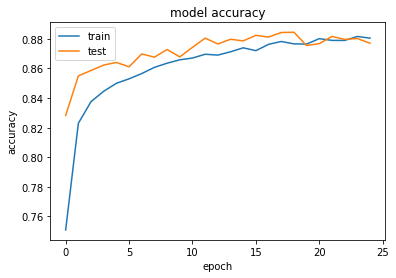

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
model_6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_20 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_layer_4 (Dense)        (None, 512)              